# Kinase score follow-up analysis

In [1]:
import pandas as pd
import numpy as np
from sklearn import decomposition
import scipy as sp
import umap
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
kscores_full = pd.read_csv(
    '/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/2023.05.09_CJ_cohort_and_celllines/kinase_results/kinase_scores.tsv',
    sep='\t')
kscores = kscores_full.loc[:, ~kscores_full.columns.str.contains('targets')].set_index('PSP Kinases')
kscores = kscores.T
kscores

PSP Kinases,AAK1,ALK,AMPKA1,AMPKA2,AMPKB1,AMPKG2,ARAF,ASK1,ATM,ATR,...,Wee1,YSK1,Yes,ZAK,ZAP70,mTOR,p70S6K,p70S6K iso2,p90RSK,smMLCK
I007-031-108742,1.395612,-1.697763,-0.476179,-0.638042,2.499117,3.091661,-1.152550,-1.167395,-2.062610,-2.133322,...,-1.904748,0.284343,NaN,-0.907645,-1.614282,-1.195494,-0.410415,-1.244995,-1.054878,0.344265
I043-005-95540,-0.369139,-1.128481,-1.049202,-1.851612,-0.413156,-0.520296,-1.759454,-2.906041,0.611682,0.375171,...,0.161812,-0.579439,NaN,-0.533255,-1.141273,-0.723560,-1.001420,-1.856165,-3.020610,-0.997744
I007-020-1007541,1.060153,-1.688284,0.493206,-0.415139,3.851917,4.769475,-0.870471,-0.198159,-1.297086,-1.617058,...,-1.887486,-0.433192,NaN,-0.990235,-1.588511,-0.544310,1.152477,-0.392972,-0.263921,0.045094
I007-039-130734,1.010693,-1.192259,-0.057733,-0.863333,3.168707,3.922122,-1.013490,-1.152126,-1.731164,-1.732756,...,-1.720216,-0.080914,NaN,-0.974721,-1.537181,-0.804282,-0.268106,-0.406524,-1.020213,0.396466
I043-001-80842,-0.151720,-1.440749,0.290313,-0.926376,0.023841,0.021691,-0.945071,-2.638240,0.898318,0.561421,...,0.294585,-0.751115,NaN,-0.155298,-1.044975,-0.187050,0.161370,-1.207584,-1.422803,-1.065730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRCM-G-401,-1.453566,-2.107550,-0.390027,0.361739,-1.177853,-1.468714,1.295364,-0.173302,-0.200008,0.490667,...,0.850691,0.615770,0.416608,1.777586,0.021270,2.524527,0.484728,-1.173323,0.699904,2.468098
SRCM-SYO-1,-1.449904,-1.938292,-0.462206,0.164191,-1.729958,-2.153464,-2.517160,-0.893608,-0.102437,0.773513,...,0.817987,2.106998,0.379845,1.855230,-0.132327,2.542134,0.186720,-2.562203,0.409683,1.512318
SRCM-MES-SA,-2.102388,-2.473647,0.037234,-0.322715,-1.326701,-1.653324,-0.116057,-0.780938,-0.185724,0.767741,...,1.400892,0.099499,0.192350,1.488746,0.128591,2.732481,2.086233,-1.220875,1.566254,1.787413
mean,-0.187605,0.116999,-2.256206,-0.281380,-0.004780,0.005081,-0.172656,-0.123267,-0.222061,-0.413268,...,-0.185711,-0.072175,-0.047879,0.236353,-0.002219,-3.947489,-0.941569,-0.185070,-2.237457,-0.284981


In [3]:
metadata = pd.read_excel(
    '/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_MTBs_Evaluation/SOLID_TUMORS_Metadata_230427_CJ.xlsx',
    sheet_name='SOLID_TUMORS_Metadata_CJ_oncotr')
metadata

,Sample name,Program,Entity,code_oncotree,breadcrumb_oncotree,Histologic subtype,"Histologic subtype, specifications",ICD03 - Morpho ID,Timeline,Batch_No,...,Localisation,Portal,Empfehlung MTB,Follow up,Sex,year of birth,Discussed retrospective,Discussed prospective MTB,tissue_topology,tissue_topology_specification
0,I007-031-108742,INFORM,Sarcoma,ARMS,"SOLID>SOFT_TISSUE>RMS>ARMS, Alveolar Rhabdomyo...",Rhabdomyosarcoma,Alveolar Rhabdomyosarcoma,8920/3,retrospective,1,...,NaN,Marvin,exp+: VEGFB; PIK3CG SNV (in RAS binding domain...,no targeted therapy --> PD --> 3rd analysis (I...,male,2002,NaN,NaN,Soft Tissue,M. quadriceps femoris rechts
1,I043-005-95540,INFORM,Sarcoma,ARMS,"SOLID>SOFT_TISSUE>RMS>ARMS, Alveolar Rhabdomyo...",Rhabdomyosarcoma,Alveolar Rhabdomyosarcoma,8920/3,retrospective,1,...,"Tumor, Leiste",Marvin,"FGFR4 amplif.; exp+: FGFR2, exp+: ALK",Ceritinib --> dead,female,2006,NaN,NaN,Soft Tissue,"Tumor, Leiste"
2,I007-020-1007541,INFORM,Sarcoma,ARMS,"SOLID>SOFT_TISSUE>RMS>ARMS, Alveolar Rhabdomyo...",Rhabdomyosarcoma,Alveolar Rhabdomyosarcoma,8920/3,retrospective,1,...,"Metastasis, Lung",Marvin,"exp+: CD274; exp+: FLT1, MAPK3",Nivolumab --> SD (6months) --> PD (9 months) -...,male,2002,NaN,NaN,Lung (PUL),Lungenunterlappen
3,I007-039-130734,INFORM,Sarcoma,ARMS,"SOLID>SOFT_TISSUE>RMS>ARMS, Alveolar Rhabdomyo...",Rhabdomyosarcoma,Alveolar Rhabdomyosarcoma,8920/3,retrospective,1,...,NaN,Marvin,exp+: FLT1,"Ipilimumab, Nivomumab (5.1.19) --> SD --> PR -...",male,2002,NaN,NaN,Lung (PUL),Lung; NOS
4,I043-001-80842,INFORM,Sarcoma,ARMS,"SOLID>SOFT_TISSUE>RMS>ARMS, Alveolar Rhabdomyo...",Rhabdomyosarcoma,Alveolar Rhabdomyosarcoma,8920/3,retrospective,1,...,"Tumor, Leiste",Marvin,"FGFR4 amplif.; exp+: FGFR2, exp+: ALK",no targeted therapy --> PR --> PD (18 months) ...,female,2006,NaN,NaN,Soft Tissue,"Tumor, Leiste"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,K26K-2SEUP3-M12-Q1,MASTER,other,missing,missing,missing,missing,missing,prospective,106,...,NaN,NaN,NaN,NaN,missing,missing,NaN,NaN,missing,NaN
624,S033-33+002-T2-Q1,MASTER,Chordoma,CHDM,"SOLID>BONE>CHDM, Chordoma",Chordoma,"Chordoma, NOS",9370/3,retrospective,106,...,NaN,NaN,NaN,NaN,missing,missing,NaN,NaN,missing,NaN
625,S033-33+003-T2-Q1,MASTER,Chordoma,CHDM,"SOLID>BONE>CHDM, Chordoma",Chordoma,"Chordoma, NOS",9370/3,retrospective,106,...,NaN,NaN,NaN,NaN,missing,missing,NaN,NaN,missing,NaN
626,S033-33+005-T1-Q1,MASTER,Chordoma,CHDM,"SOLID>BONE>CHDM, Chordoma",Chordoma,"Chordoma, NOS",9370/3,retrospective,106,...,NaN,NaN,NaN,NaN,missing,missing,NaN,NaN,missing,NaN


In [4]:
metadata['code_oncotree'].value_counts()

CHDM     73
ARMS     40
LMS      35
ERMS     33
SYNS     31
         ..
LUACC     1
SDCA      1
LIPO      1
LUAD      1
UCCC      1
Name: code_oncotree, Length: 117, dtype: int64

In [7]:
rms_meta = metadata.loc[metadata['code_oncotree'].str.contains('RMS')]
rms_meta

,Sample name,Program,Entity,code_oncotree,breadcrumb_oncotree,Histologic subtype,"Histologic subtype, specifications",ICD03 - Morpho ID,Timeline,Batch_No,...,Localisation,Portal,Empfehlung MTB,Follow up,Sex,year of birth,Discussed retrospective,Discussed prospective MTB,tissue_topology,tissue_topology_specification
0,I007-031-108742,INFORM,Sarcoma,ARMS,"SOLID>SOFT_TISSUE>RMS>ARMS, Alveolar Rhabdomyo...",Rhabdomyosarcoma,Alveolar Rhabdomyosarcoma,8920/3,retrospective,1,...,NaN,Marvin,exp+: VEGFB; PIK3CG SNV (in RAS binding domain...,no targeted therapy --> PD --> 3rd analysis (I...,male,2002,NaN,NaN,Soft Tissue,M. quadriceps femoris rechts
1,I043-005-95540,INFORM,Sarcoma,ARMS,"SOLID>SOFT_TISSUE>RMS>ARMS, Alveolar Rhabdomyo...",Rhabdomyosarcoma,Alveolar Rhabdomyosarcoma,8920/3,retrospective,1,...,"Tumor, Leiste",Marvin,"FGFR4 amplif.; exp+: FGFR2, exp+: ALK",Ceritinib --> dead,female,2006,NaN,NaN,Soft Tissue,"Tumor, Leiste"
2,I007-020-1007541,INFORM,Sarcoma,ARMS,"SOLID>SOFT_TISSUE>RMS>ARMS, Alveolar Rhabdomyo...",Rhabdomyosarcoma,Alveolar Rhabdomyosarcoma,8920/3,retrospective,1,...,"Metastasis, Lung",Marvin,"exp+: CD274; exp+: FLT1, MAPK3",Nivolumab --> SD (6months) --> PD (9 months) -...,male,2002,NaN,NaN,Lung (PUL),Lungenunterlappen
3,I007-039-130734,INFORM,Sarcoma,ARMS,"SOLID>SOFT_TISSUE>RMS>ARMS, Alveolar Rhabdomyo...",Rhabdomyosarcoma,Alveolar Rhabdomyosarcoma,8920/3,retrospective,1,...,NaN,Marvin,exp+: FLT1,"Ipilimumab, Nivomumab (5.1.19) --> SD --> PR -...",male,2002,NaN,NaN,Lung (PUL),Lung; NOS
4,I043-001-80842,INFORM,Sarcoma,ARMS,"SOLID>SOFT_TISSUE>RMS>ARMS, Alveolar Rhabdomyo...",Rhabdomyosarcoma,Alveolar Rhabdomyosarcoma,8920/3,retrospective,1,...,"Tumor, Leiste",Marvin,"FGFR4 amplif.; exp+: FGFR2, exp+: ALK",no targeted therapy --> PR --> PD (18 months) ...,female,2006,NaN,NaN,Soft Tissue,"Tumor, Leiste"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,H021-HBR2CL-M1-Q1,MASTER,Sarcoma,RMS,"SOLID>SOFT_TISSUE>RMS, Rhabdomyosarcoma",Rhabdomyosarcoma,"Rhabdomyosarcoma, NOS",8900/3,prospective,93,...,Metastasis,Oncostar2,NaN,NaN,male,1978,NaN,NaN,n.d.,NaN
523,H021-CHWE2F-M1-Q1,MASTER,Sarcoma,SCRMS,"SOLID>SOFT_TISSUE>RMS>SCRMS, Spindle Cell Rhab...",Rhabdomyosarcoma,"Rhabdomyosarcoma, NOS",missing,prospective,93,...,Metastasis,Oncostar1,NaN,NaN,female,1997,NaN,NaN,n.d.,Raumforderung zervikal links level III/IV
529,H021-LKCJEL-U1-Q1,MASTER,Sarcoma,SCRMS,"SOLID>SOFT_TISSUE>RMS>SCRMS, Spindle Cell Rhab...",Rhabdomyosarcoma,Spindle cell RMS,missing,prospective,94,...,NaN,Oncostar1,NaN,NaN,male,1997,NaN,NaN,n.d.,NaN
552,I034-071-2T1-P1,INFORM,Sarcoma,ERMS,"SOLID>SOFT_TISSUE>RMS>ERMS, Embryonal Rhabdomy...",Rhabdomyosarcoma,Embryonal Rhabdomyosarcoma,8910/3,prospective,97,...,left orbita,Marvin,NaN,NaN,female,2021,NaN,NaN,Soft Tissue,Orbita left; Tumor


In [9]:
rms_patients = rms_meta.set_index('Sample name')['code_oncotree'].to_dict()
rms_patients

{'I007-031-108742': 'ARMS',
 'I043-005-95540': 'ARMS',
 'I007-020-1007541': 'ARMS',
 'I007-039-130734': 'ARMS',
 'I043-001-80842': 'ARMS',
 'I043-005-130270': 'ARMS',
 'H021-LGAPJC-M1': 'ARMS',
 'H021-XT8RXW-T2': 'PLRMS',
 'H021-XP5T1N-M4': 'PLRMS',
 'H021-GDTFYK-M2': 'ARMS',
 'I028-003-84352': 'ERMS',
 'I137-003-84050': 'ARMS',
 'I022-018-98376': 'ARMS',
 'I003-006-103006': 'ERMS',
 'I024-015-104566': 'ERMS',
 'I015-006-107208': 'ARMS',
 'I024-034-189638': 'ERMS',
 'I034-044-186620': 'ERMS',
 'I052-003-93894': 'ARMS',
 'I007-007-80690': 'ARMS',
 'I062-008-87120': 'ERMS',
 'I002-010-106444': 'ARMS',
 'I036-012-107936': 'ARMS',
 'I024-020-127332': 'ARMS',
 'I054-033-226658': 'ERMS',
 'I010-021-226690': 'ARMS',
 'I010-022-226744': 'ARMS',
 'H021-4CYFXD-M1': 'PLRMS',
 'I076-042-9T1': 'RMS',
 'H021-AR786E-M12': 'ARMS',
 'H021-1KJALE-M1-E2': 'SCRMS',
 'H021-S5LP5E-M2-E2': 'RMS',
 'H021-XQGYFN-T2-E2': 'SCRMS',
 'I008-015-0T1-P1': 'ERMS',
 'I027-028-1T1-P1': 'ERMS',
 'I045-006-0T1-P1': 'ARMS'

In [24]:
sarc_metadata = metadata.loc[metadata['Entity'] == 'Sarcoma'][['Sample name', 'code_oncotree']]
sarc_scores = kscores.loc[kscores.index.isin(sarc_metadata['Sample name'])]
sarc_scores

PSP Kinases,AAK1,ALK,AMPKA1,AMPKA2,AMPKB1,AMPKG2,ARAF,ASK1,ATM,ATR,...,Wee1,YSK1,Yes,ZAK,ZAP70,mTOR,p70S6K,p70S6K iso2,p90RSK,smMLCK
I007-031-108742,1.424326,-1.761258,-0.496825,-0.455587,1.943283,2.002758,-1.257770,-0.778268,-1.833952,-1.837541,...,-2.092708,0.335423,NaN,-0.889845,-1.704976,-1.422480,-0.547894,-1.316545,-0.618292,0.104291
I043-005-95540,-0.366579,-1.178950,-1.083132,-1.865040,-0.691850,-0.715597,-1.910792,-3.148109,0.791290,0.675065,...,-0.231390,-0.547099,NaN,-0.494251,-1.181025,-1.082746,-1.379935,-1.974899,-2.240862,-1.179036
I007-020-1007541,1.084894,-1.752378,0.360212,-0.217341,2.188136,2.255344,-0.954708,0.321863,-1.153948,-1.348882,...,-2.024916,-0.398002,NaN,-0.976102,-1.675570,-0.516351,0.220816,-0.380236,-0.069082,-0.249482
I007-039-130734,1.034808,-1.238287,-0.179469,-0.724395,1.871393,1.928598,-1.103138,-0.696319,-1.508023,-1.436916,...,-1.858974,-0.039976,NaN,-0.959924,-1.618701,-0.838369,-0.389866,-0.385315,-0.806200,0.220747
I043-001-80842,-0.146053,-1.502961,0.191413,-0.924171,-0.561727,-0.581364,-0.959779,-2.920556,0.941134,0.930359,...,-0.165882,-0.721211,NaN,-0.091167,-1.074255,-0.238463,-0.275512,-1.272307,-1.021201,-1.363186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H021-SBTRPD-M1-Q1,0.591213,-1.518863,0.157334,0.966112,-1.481629,-1.530318,0.493178,-0.074569,0.173531,0.546863,...,2.851238,0.655661,0.458706,1.859564,-0.243545,2.275103,-0.144376,1.282617,0.534592,0.773610
H021-XHXA22-M7-Q1,-0.347032,-1.840159,-0.536005,-0.030465,-0.621838,-0.643374,-0.110557,-0.121997,-0.523103,-0.277662,...,1.551541,0.623377,1.285630,-1.284151,0.805627,0.940429,-1.474600,-0.328554,-0.640682,-0.764834
H021-DMVRFB-M1-Q1,1.365724,-0.141507,0.090177,-0.562315,-2.300586,-2.375140,-0.873047,-0.000695,-0.478394,-0.284097,...,-0.463238,-0.585163,0.028446,0.445135,NaN,0.586063,-0.234197,1.051087,-0.308037,1.562212
I022-063-1M1-P1,1.277288,-1.080488,1.588450,1.760202,-0.118635,-0.124279,-1.762613,1.195021,0.261418,0.391314,...,0.804068,-1.433678,-1.841119,0.678663,NaN,-0.428201,1.057430,0.436594,-0.522333,0.373480


In [33]:
sarc_scores.isna().sum()[['ATM', 'ATR', 'DNAPK']]

PSP Kinases
ATM      0
ATR      0
DNAPK    0
dtype: int64

In [51]:
pca_kscores = decomposition.PCA(n_components=3)
pca_kscores_df = pd.DataFrame(
    data=pca_kscores.fit_transform(sarc_scores[['ATM', 'ATR', 'DNAPK']]),
    columns=['PC1', 'PC2', 'PC3'],
    index=sarc_scores.index
)
pca_kscores_df = pd.merge(left=pca_kscores_df, right=sarc_metadata, left_index=True, right_on='Sample name',
                          how='left').set_index('Sample name')
pca_kscores_df

,PC1,PC2,PC3,code_oncotree
Sample name,,,,
I007-031-108742,-3.173734,-0.293852,0.090980,ARMS
I043-005-95540,1.081627,-0.095608,-0.037239,ARMS
I007-020-1007541,-2.099602,-0.436395,0.028934,ARMS
I007-039-130734,-2.487475,-0.345226,0.187680,ARMS
I043-001-80842,1.232748,0.191387,-0.100178,ARMS
...,...,...,...,...
H021-SBTRPD-M1-Q1,0.412273,0.090025,0.246261,ULMS
H021-XHXA22-M7-Q1,-0.777706,-0.108558,0.229526,BA
H021-DMVRFB-M1-Q1,-0.817183,-0.032016,0.148341,LMS


In [52]:
pca_kscores_df['code_oncotree'] = pca_kscores_df['code_oncotree'].apply(
    lambda x: x if x in set(rms_patients.values()) else 'Other Sarcoma')

<AxesSubplot: xlabel='PC1', ylabel='PC2'>

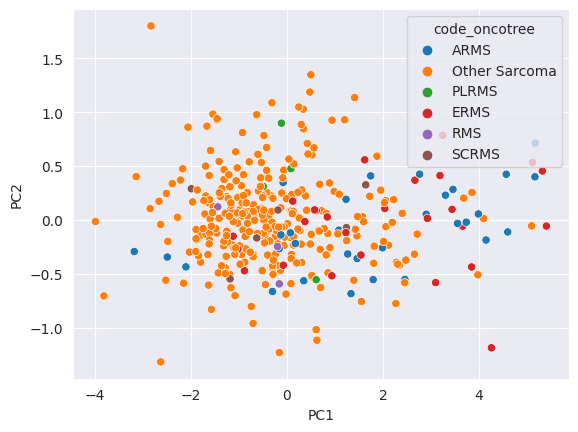

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=pca_kscores_df, x="PC1", y="PC2", hue='code_oncotree')

In [46]:
pca_kscores.explained_variance_ratio_

array([0.91679689, 0.0599518 , 0.02325131])

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


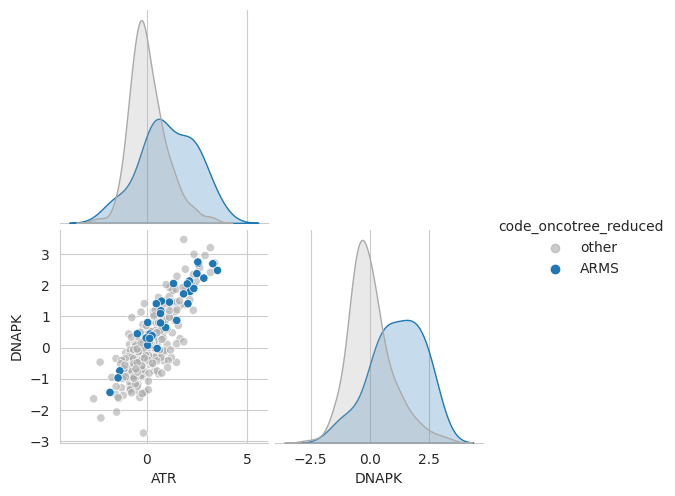

In [206]:
from matplotlib.colors import to_rgba

annot_scores = pd.merge(left=sarc_scores, right=sarc_metadata, left_index=True, right_on='Sample name',
                        how='left').set_index('Sample name')
annot_scores['code_oncotree_reduced'] = annot_scores['code_oncotree'].apply(lambda x: x if x in ['ARMS'] else 'other')
# annot_scores['code_oncotree'] = annot_scores['code_oncotree'].apply(lambda x: x if x in set(rms_patients.values()) else 'other')
pal = sns.color_palette()
print(pal.as_hex())

color_dict = {'other': to_rgba('#AAAAAA', 0.6),
              np.NaN: to_rgba('#FFFFFF', 0),
              'ARMS': to_rgba('#1f77b4', 1)}
# color_dict = {'other': to_rgba('#AAAAAA', 0.4),
#               np.NaN: to_rgba('#FFFFFF', 0),
#               'ARMS': to_rgba('#1f77b4', 1),
#               'RMS': to_rgba('#ff7f0e', 1),
#               'PLRMS': to_rgba('#2ca02c', 1),
#               'SCRMS': to_rgba('#d62728', 1),
#               'ERMS': to_rgba('#9467bd', 1)}
# sns.scatterplot(data=annot_scores, x='ATM', y='ATR', hue='code_oncotree_reduced', palette=color_dict)
# plt.show()
# plt.close()
# annot_scores['code_oncotree_reduced'] = annot_scores['code_oncotree_reduced'].apply(lambda x: x if x in set(rms_patients.values()) else np.NaN)
# sns.scatterplot(data=annot_scores, x='ATM', y='ATR', hue='code_oncotree_reduced', palette=color_dict)
# plt.show()
# plt.close()

sns.pairplot(data=annot_scores.sort_values(by='code_oncotree_reduced', ascending=False), vars=['ATR', 'DNAPK'],
             hue='code_oncotree_reduced', palette=color_dict, corner=True, diag_kws={'common_norm': False})
plt.show()
plt.close()

In [24]:
# dscores_full = pd.read_csv('/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/2023.05.09_CJ_cohort_and_celllines/drug_results_all/drug_scores.tsv', sep='\t')
dscores_full = pd.read_csv(
    '/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/2023.05.09_CJ_cohort_and_celllines/drug_results_A431/drug_scores.tsv',
    sep='\t')
dscores = dscores_full.loc[:, ~dscores_full.columns.str.contains('targets')].set_index('Drug').T
dscores

Drug,AZD0156,AZD4547,Abemaciclib,Acalabrutinib,Afatinib,Alectinib,Alisertib,Alpelisib,Anlotinib,Apatinib,...,Tucatinib,Umbralisib,Upadacitinib,Vandetanib,Varlitinib,Vatalanib,Vemurafenib,Volasertib,Volitinib,Zanubrutinib
I007-031-108742,-2.896897,-1.314104,-1.831826,-0.985209,-1.103259,-2.024588,-1.353294,-1.558558,-1.017302,-0.754011,...,-1.748867,-1.413080,-1.983892,-2.575367,-1.545222,-0.633483,-2.213212,-1.590280,-2.255086,-1.312915
I043-005-95540,-1.670279,-1.081221,-2.148826,-0.170462,-2.351075,-0.555191,-0.784226,-1.597735,-0.429822,-1.661529,...,-2.650523,-0.825169,-3.345324,-1.902652,-2.615366,0.368895,-2.811939,-1.526604,-0.839552,-2.267205
I007-020-1007541,-1.585363,-2.228536,-1.580192,-1.598153,-0.663399,-1.344107,-1.221612,-1.532377,-1.065537,-0.962032,...,-1.495578,-0.098325,-2.790288,-2.503971,-1.033669,-0.631459,-2.527941,-1.792412,-2.584685,-0.911635
I007-039-130734,-2.226139,-2.103363,-1.749503,-1.317831,-0.871907,-1.494529,-1.237004,-1.636838,-0.691596,-0.689482,...,-2.060209,-0.702362,-2.874348,-2.368268,-1.378354,-0.520673,-2.520090,-1.869618,-2.519273,-0.892267
I043-001-80842,-0.661280,-0.860454,-1.450203,-1.208801,-1.746841,-0.051245,-0.821173,-1.073594,-0.180105,-1.512525,...,-0.929419,-0.377900,-3.212391,-1.976303,-1.950071,0.160333,-2.859975,-1.069275,-1.739491,-1.549257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRCM-G-401,0.637209,-0.307770,1.869855,0.659763,0.885304,0.288664,1.882146,1.347326,2.380033,1.086890,...,0.742734,1.941054,1.101102,1.432617,0.673579,-1.262141,0.416512,0.834426,1.195145,0.516923
SRCM-SYO-1,1.035500,-0.689796,1.703523,1.227890,0.098427,0.245802,1.801393,0.249216,2.163070,1.738423,...,0.328250,1.766036,0.166177,1.098223,-0.232903,-0.607649,-0.128349,1.585203,1.507985,-0.436799
SRCM-MES-SA,0.919421,0.373935,1.167326,0.143161,0.320085,0.064536,1.419655,0.590049,2.567480,0.490140,...,0.444136,1.218467,0.532138,1.405723,0.071986,-1.038296,1.114570,1.843340,1.214489,0.062129
mean,-2.940989,-0.082992,-3.216441,-0.262064,-13.852880,-0.825879,-0.386283,-2.801806,-2.135213,-0.157100,...,-2.712932,-0.007655,-0.551689,-7.089671,-10.261606,-0.458048,-1.215942,-0.495602,-0.241587,-9.564131


Text(0.5, 1.0, 'Drugscore based on A431')

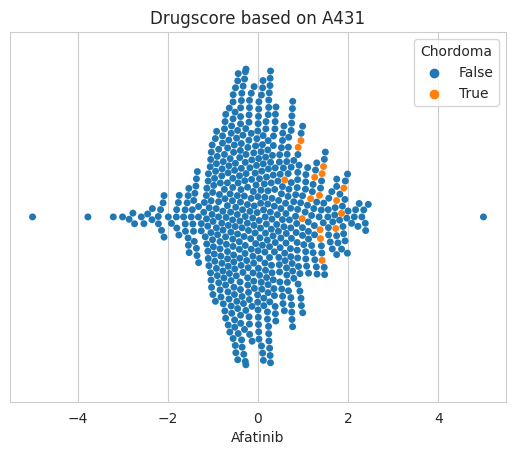

In [25]:
dscores_flagged = dscores.copy()
dscores_flagged['Chordoma'] = False
dscores_flagged.loc[dscores_flagged.index.str.startswith('CHDM'), 'Chordoma'] = True
dscores_flagged.loc[dscores_flagged['Afatinib'] > 5, 'Afatinib'] = 5
dscores_flagged.loc[dscores_flagged['Afatinib'] < -5, 'Afatinib'] = -5
sns.swarmplot(data=dscores_flagged, x='Afatinib', hue='Chordoma')
plt.title('Drugscore based on A431')

Text(0.5, 1.0, 'Drugscore based on all cell lines')

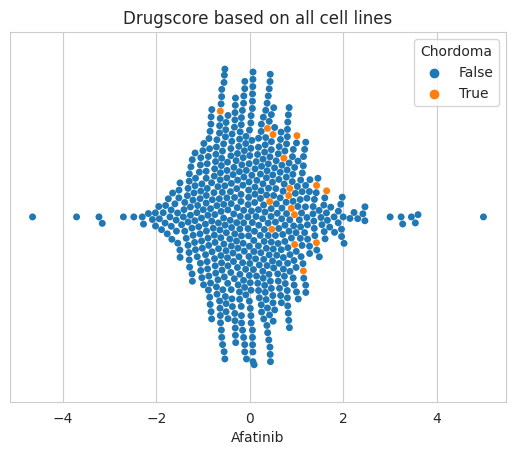

In [23]:
dscores_flagged = dscores.copy()
dscores_flagged['Chordoma'] = False
dscores_flagged.loc[dscores_flagged.index.str.startswith('CHDM'), 'Chordoma'] = True
dscores_flagged.loc[dscores_flagged['Afatinib'] > 5, 'Afatinib'] = 5
dscores_flagged.loc[dscores_flagged['Afatinib'] < -5, 'Afatinib'] = -5
sns.swarmplot(data=dscores_flagged, x='Afatinib', hue='Chordoma')
plt.title('Drugscore based on all cell lines')

In [7]:
chordomas = dscores.loc[dscores.index.str.startswith('CHDM'), 'Afatinib'].sort_values(ascending=False)
chordomas

CHDM-MUG-CC1.1     1.903701
CHDM-UM-Chor1      1.852159
CHDM-MUG-CC1       1.742318
CHDM-U-CH12        1.724248
CHDM-UM-Chor5C     1.452443
CHDM-U-CHCF365     1.422098
CHDM-U-CH17PII     1.421860
CHDM-U-CH1         1.385450
CHDM-13425-306     1.376062
CHDM-UM-Chor6      1.363161
CHDM-MUG-Chor1     1.257663
CHDM-JHC-7         1.165380
CHDM-U-CH2         0.978356
CHDM-UM-Chor5D     0.953341
CHDM-CH-22         0.891708
CHDM-U-CHCF359B    0.593918
Name: Afatinib, dtype: float64

In [8]:
via = pd.read_excel('/home/fhamood/Downloads/CHDM cell lines_EGFR signaling.xlsx')
via = via.rename(columns={'Unnamed: 10': 'resistance'})
via

,Sample name,IL18 z score,EGFR z-score,EGFR Basket score,EGFR protein phosphorylation,EGFR kinase score,Batch,Channel,EGFR signaling++ (according to phosphoproteome analysis,EC50,resistance
0,CHDM-U-CH2,2.666054,1.044831,3.510911,1.900833,-2.063934,16,1,no,> 1000,resistant
1,CHDM-JHC-7,2.490769,1.251437,5.817634,1.355271,-0.643636,15,7,no,> 1000,resistant
2,CHDM-UM-Chor5D,2.274870,1.477559,10.337046,2.875990,0.881031,16,4,(yes),> 1000,resistant
3,CHDM-U-CHCF359B,1.793561,1.089446,7.895566,0.712775,0.129590,15,4,no,> 1000,resistant
4,CHDM-CH-22,1.434643,2.718027,16.743390,5.213032,1.975397,15,1,yes,> 1000,resistant
5,CHDM-UM-Chor5C,0.747869,1.744227,14.618906,3.597696,2.250577,16,3,yes,> 1000,resistant
6,CHDM-U-CHCF365,3.929326,1.606071,15.317373,2.432079,4.111139,15,5,yes,5,NaN
7,CHDM-13425-306,3.045634,2.699208,11.385088,7.059096,0.134124,16,5,(yes),3,NaN
8,CHDM-U-CH17PII,2.261456,1.556650,9.143372,2.571928,1.454822,15,3,(yes),11,NaN
9,CHDM-U-CH1,2.027920,1.538684,13.991640,1.092615,3.755958,15,2,(yes),33,NaN


In [11]:
chordomas_merged = pd.merge(left=chordomas, right=via, left_index=True, right_on='Sample  name', how='inner',
                            validate='one_to_one').rename(columns={'Afatinib': 'Afatinib_TOPAS'})

# print(chordomas_merged[['Sample  name', 'EC50', 'resistance', 'Afatinib_TOPAS', 'EGFR Basket score', 'EGFR kinase score', 'IL18 z score', 'EGFR z-score', 'EGFR protein phosphorylation', 'Batch', 'Channel', 'EGFR signaling++ (according to phosphoproteome analysis']].sort_values(by='Afatinib_TOPAS', ascending=False))
chordomas_merged[['Sample  name', 'EC50', 'resistance', 'EGFR Basket score', 'EGFR z-score', 'EGFR protein phosphorylation', 'Afatinib_TOPAS']].sort_values(by='EGFR Basket score', ascending=False)

,Sample name,EC50,resistance,EGFR Basket score,EGFR z-score,EGFR protein phosphorylation,Afatinib_TOPAS
4,CHDM-CH-22,> 1000,resistant,16.743390,2.718027,5.213032,0.891708
11,CHDM-U-CH12,27,NaN,16.128540,2.134421,4.667061,1.724248
6,CHDM-U-CHCF365,5,NaN,15.317373,1.606071,2.432079,1.422098
5,CHDM-UM-Chor5C,> 1000,resistant,14.618906,1.744227,3.597696,1.452443
15,CHDM-UM-Chor1,23,NaN,14.435507,1.792022,2.475551,1.852159
9,CHDM-U-CH1,33,NaN,13.991640,1.538684,1.092615,1.385450
7,CHDM-13425-306,3,NaN,11.385088,2.699208,7.059096,1.376062
2,CHDM-UM-Chor5D,> 1000,resistant,10.337046,1.477559,2.875990,0.953341
8,CHDM-U-CH17PII,11,NaN,9.143372,1.556650,2.571928,1.421860
13,CHDM-MUG-CC1.1,14,NaN,8.520245,0.809944,2.287162,1.903701


In [93]:
scored_peptides_all = pd.read_csv('/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/2023.05.09_CJ_cohort_and_celllines/drug_results_A431/scored_peptides.tsv', sep='\t')
scored_peptides = scored_peptides_all.copy()

,Drug,Modified sequence,weight_I007-031-108742,weight_I043-005-95540,weight_I007-020-1007541,weight_I007-039-130734,weight_I043-001-80842,weight_I043-005-130270,weight_H021-7AAYWW-T1,weight_H021-7AAYWW-T2,...,weighted_SRCM-SK-LMS1,weighted_SRCM-SW-827,weighted_SRCM-KHOS-240S,weighted_SRCM-KHOS-NP,weighted_SRCM-RD-1,weighted_SRCM-HS-729,weighted_SRCM-A-204,weighted_SRCM-G-401,weighted_SRCM-SYO-1,weighted_SRCM-MES-SA
0,AZD0156,_(Acetyl (Protein N-term))M(Oxidation (M))SETA...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000038,0.003862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AZD0156,_(Acetyl (Protein N-term))M(Oxidation (M))SETA...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003137,0.009252,-0.003898,-0.001324,-0.002364,-0.000082,-0.002704,-0.002499,-0.001741,-0.003965
2,AZD0156,_(Acetyl (Protein N-term))MSETAPAETATPAPVEKpSPAK_,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AZD0156,_(Acetyl (Protein N-term))SETAPAETATPAPVEKpSPA...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.085823,-0.077290,-0.197057,-0.178204,-0.076145,-0.167998,-0.002405,-0.122145,-0.103759,-0.189656
4,AZD0156,_(Acetyl (Protein N-term))SETAPAETATPAPVEKpSPAKK_,0.187518,0.187518,0.187518,0.187518,0.187518,0.187518,0.187518,0.187518,...,0.090915,0.102639,0.105179,0.199739,0.161296,0.177766,0.121592,0.080890,0.170665,-0.010660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64896,Zanubrutinib,_pTPKDpSPGIPPSANAHQLFR_,1.071429,1.071429,1.071429,1.071429,1.071429,1.071429,1.071429,1.071429,...,-0.261326,1.420416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64897,Zanubrutinib,_pTPKDpSPGIPPpSANAHQLFR_,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64898,Zanubrutinib,_pTRSFGHFPGPEFLDVEK_,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.190044,-0.736116,-1.022087,-0.330791,-0.165365,-0.664250,0.689132,-0.501935,-0.618669,0.266651
64899,Zanubrutinib,_pTSSSETEEKKPEKPLILQSLGPK_,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.901762,0.358794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
";".join(map(str, list(set(['up', 'down', np.NaN]))))

'nan;down;up'

In [110]:
scored_peptides = scored_peptides_all.copy()
chordoma_lines = chordomas.index.to_list()
scored_peptides = scored_peptides.loc[scored_peptides['Drug'] == 'Afatinib', scored_peptides.columns.str.contains('|'.join(['weighted_' + i for i in chordoma_lines]) + '|Drug|Modified sequence')]
scored_peptides.loc[~scored_peptides.loc[:, scored_peptides.columns.str.contains('|'.join(['weighted_' + i for i in chordoma_lines]))].isna().all(axis=1)]

,Drug,Modified sequence,weighted_CHDM-CH-22,weighted_CHDM-U-CH1,weighted_CHDM-U-CH17PII,weighted_CHDM-U-CHCF359B,weighted_CHDM-U-CHCF365,weighted_CHDM-UM-Chor1,weighted_CHDM-JHC-7,weighted_CHDM-MUG-CC1,weighted_CHDM-U-CH2,weighted_CHDM-U-CH12,weighted_CHDM-UM-Chor5C,weighted_CHDM-UM-Chor5D,weighted_CHDM-13425-306,weighted_CHDM-MUG-CC1.1,weighted_CHDM-MUG-Chor1,weighted_CHDM-UM-Chor6
835,Afatinib,_(Acetyl (Protein N-term))M(Oxidation (M))ERpS...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.164621,-0.231349,-0.359257,-0.239090,-0.253485,-0.271586,-0.223762,-0.168575
838,Afatinib,_AAGGGAGpSSEDDAQSR_,1.474315,1.948760,0.414122,2.526509,1.298950,2.480835,1.440325,1.962098,1.306622,1.098497,0.797787,1.222322,-0.308518,1.922536,1.266993,2.064994
840,Afatinib,_AASGEDSTEEALAAAAAPWEGGPVPGVDRpSPFAK_,1.132110,1.285714,1.089173,1.027853,1.376766,1.296768,0.638260,1.446662,1.458592,1.598766,1.555325,1.546138,1.303357,1.484504,1.201087,0.978457
841,Afatinib,_ADEASELACPpTPKEDGLAQQQTQLNLR_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.224222,-0.168352,-0.150905,-0.123591,0.048465,-0.106320,-0.206199,-0.156801
842,Afatinib,_ADEASELACPpTPK_,2.652785,1.762125,0.778810,1.344432,2.415826,0.805591,1.230579,1.835296,-0.086586,0.094229,-0.094958,-0.548369,0.899963,0.447021,0.055241,0.261475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2442,Afatinib,_pTHSDASDDEAFTTSK_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.588984,0.278382,-0.413210,-0.131739,0.255169,-0.512968,0.494611,-0.173984
2444,Afatinib,_pTISLTDFLAEDGGTGGGSTYVSK_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.394438,0.607021,1.136413,0.704570,0.624144,1.117262,0.474924,1.008140
2451,Afatinib,_pTPLLSSLSATSNNSTVACIDR_,0.070761,-1.090565,-0.725543,-1.273874,-0.270042,-0.808582,-0.099975,-1.205931,1.149402,1.616602,1.145743,1.386656,3.929925,1.290177,0.570345,0.791703
2452,Afatinib,_pTPSFGISAPQVSIPDVNVNLK_,1.259675,0.999948,-0.618476,-0.384221,0.396011,2.085152,0.149603,0.669960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


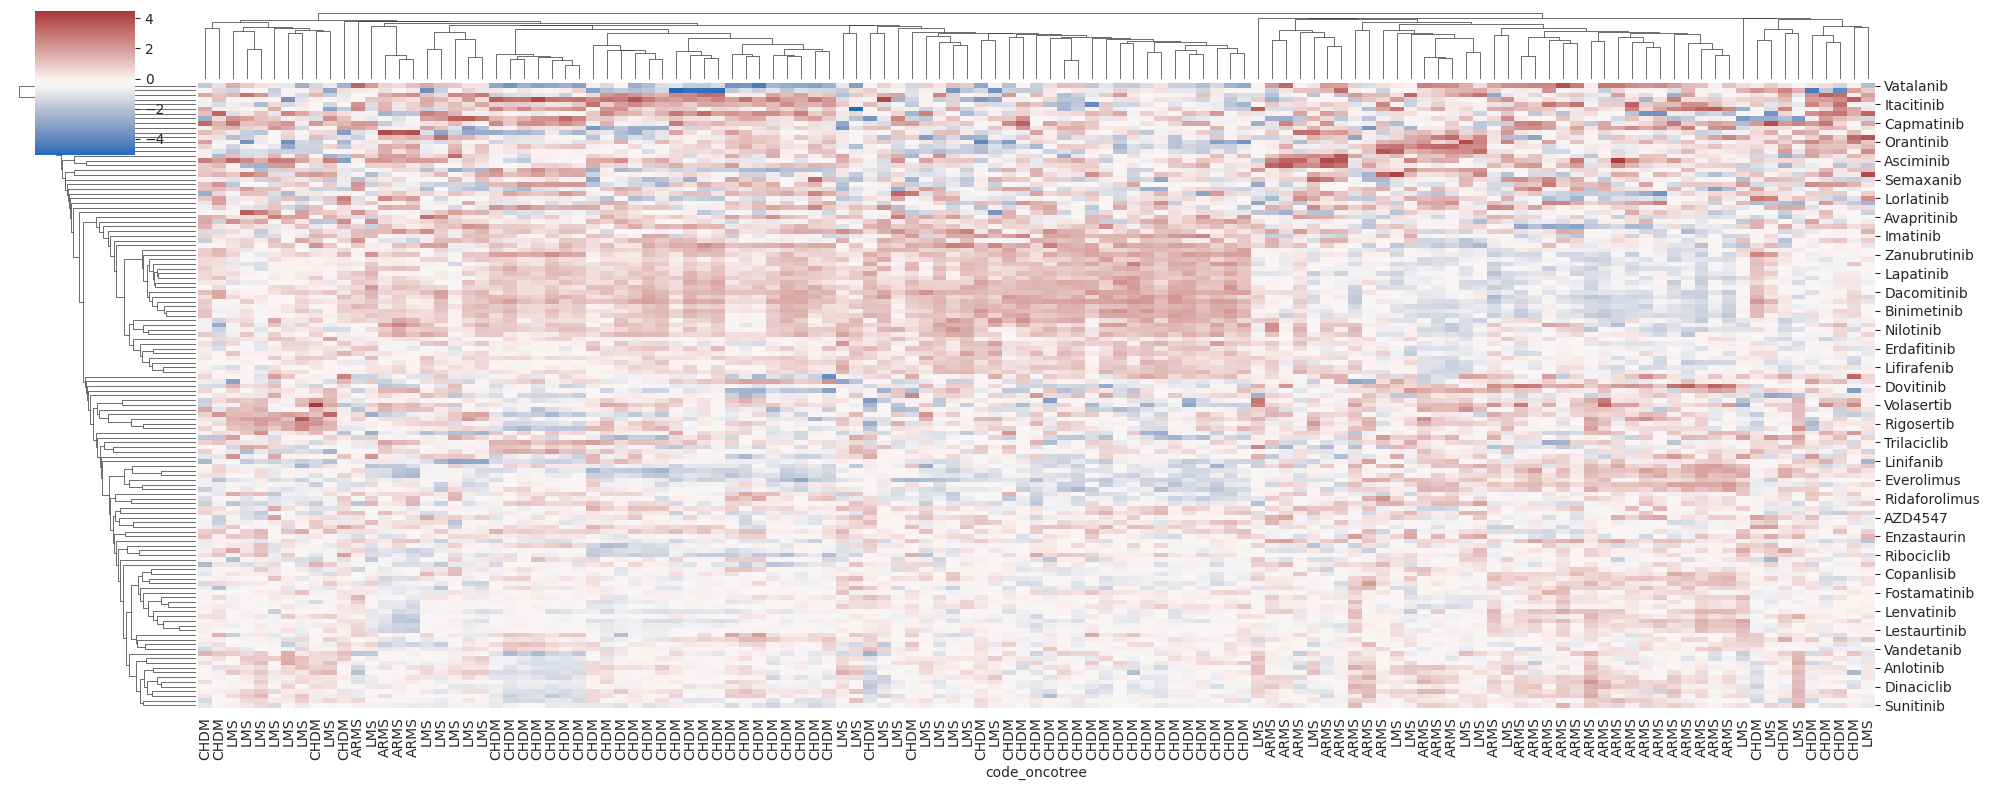

In [130]:
clusterscores = pd.merge(left=dscores, right=metadata[['Sample name', 'code_oncotree']], left_index=True,
                         right_on='Sample name', how='left').set_index('Sample name')
clusterscores = clusterscores.loc[~clusterscores['code_oncotree'].isna()]
clusterscores = clusterscores.loc[
    clusterscores['code_oncotree'].isin(['CHDM', 'ARMS', 'LMS']), ~clusterscores.isna().any()].sort_values(
    by='code_oncotree')
clusterscores
sns.clustermap(clusterscores.set_index('code_oncotree').T, figsize=(20, 8), xticklabels=True, z_score=1, cmap=sns.color_palette("vlag", as_cmap=True), vmin=-4, vmax=4, dendrogram_ratio=0.1)

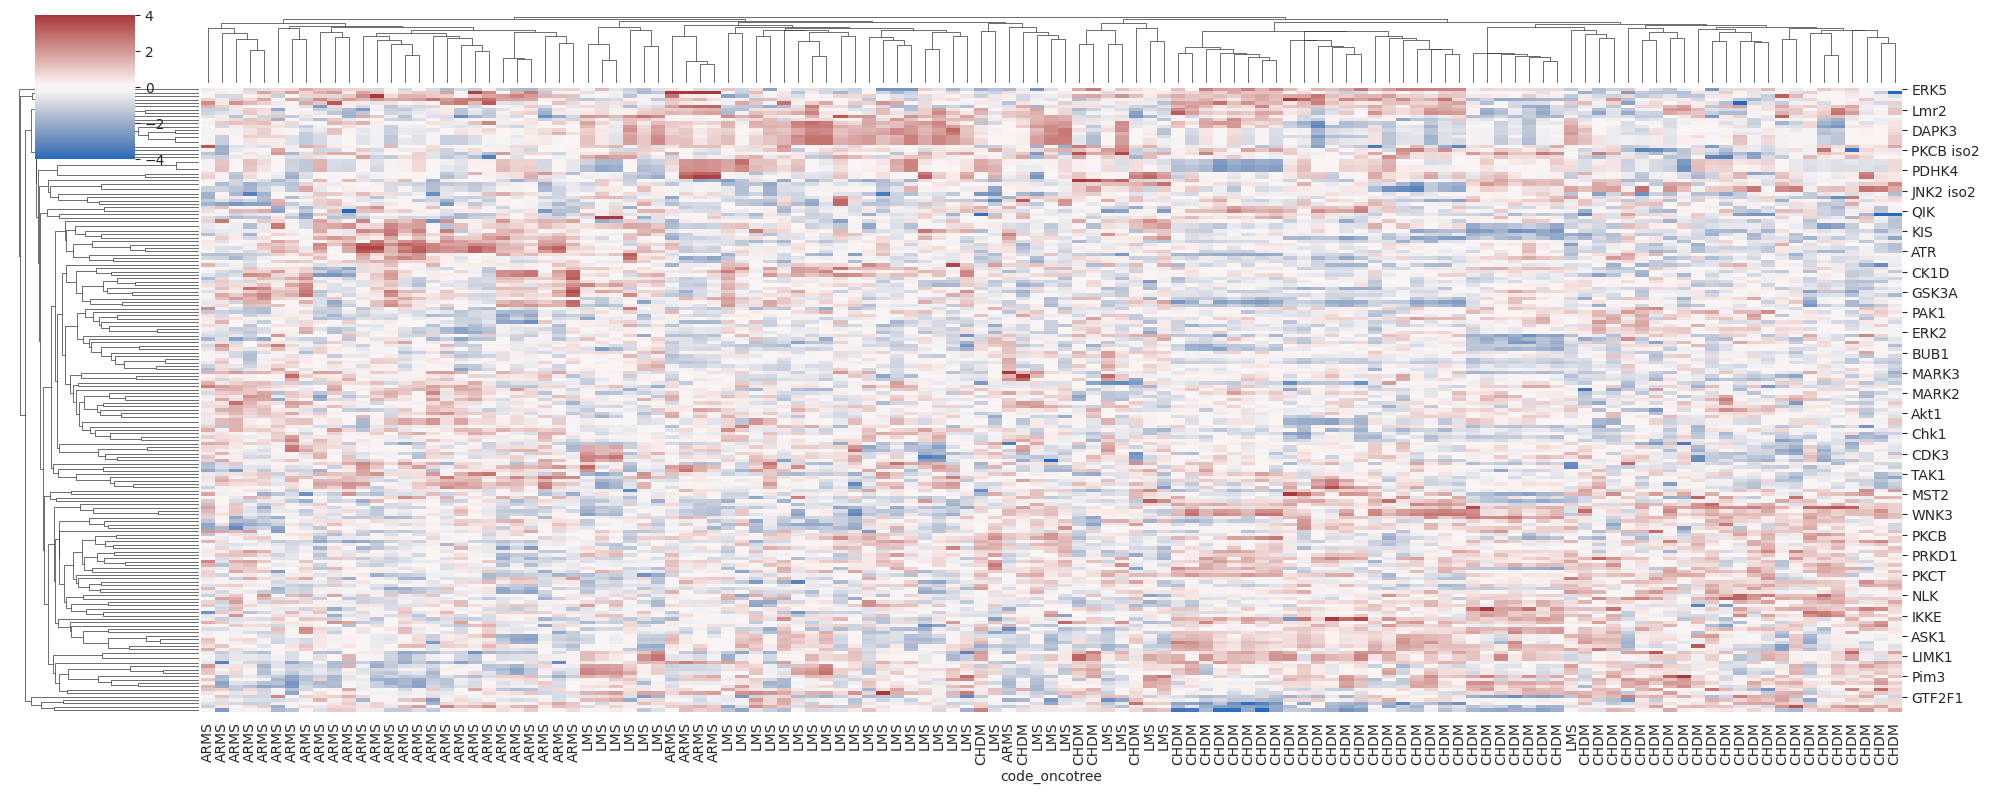

In [136]:
clusterscores = pd.merge(left=kscores, right=metadata[['Sample name', 'code_oncotree']], left_index=True,
                         right_on='Sample name', how='left').set_index('Sample name')
clusterscores = clusterscores.loc[~clusterscores['code_oncotree'].isna()]
clusterscores = clusterscores.loc[
    clusterscores['code_oncotree'].isin(['CHDM', 'ARMS', 'LMS']), ~clusterscores.isna().any()].sort_values(
    by='code_oncotree')
sns.clustermap(clusterscores.set_index('code_oncotree').T, figsize=(20, 8), xticklabels=True, z_score=1, cmap=sns.color_palette("vlag", as_cmap=True), vmin=-4, vmax=4, dendrogram_ratio=0.1)

In [43]:
zscores_base = pd.read_csv(
    '/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/2023.05.09_CJ_cohort_and_celllines/phospho_measures_z.tsv',
    sep='\t')
zscores_base

,Gene names,Modified sequence,Proteins,zscore_I007-031-108742,zscore_I043-005-95540,zscore_I007-020-1007541,zscore_I007-039-130734,zscore_I043-001-80842,zscore_I043-005-130270,zscore_H021-7AAYWW-T1,...,zscore_SRCM-SK-LMS1,zscore_SRCM-SW-827,zscore_SRCM-KHOS-240S,zscore_SRCM-KHOS-NP,zscore_SRCM-RD-1,zscore_SRCM-HS-729,zscore_SRCM-A-204,zscore_SRCM-G-401,zscore_SRCM-SYO-1,zscore_SRCM-MES-SA
0,RRP15,_(Acetyl (Protein N-term))AAAAPDSRVpSEEENLKK_,Q9Y3B9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.555360,1.520259,1.661227,1.037926,1.305114,0.941041,1.162397,1.266714,1.148478,1.717655
1,TRAF2,_(Acetyl (Protein N-term))AAASVTPPGpSLELLQPGFSK_,B1AMX7;B1AMX8;B1AMY1;Q12933;Q12933-2;Q12933-3;...,0.410520,-0.329036,0.151456,-0.267162,-0.600424,-0.810097,-0.192445,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TRAF2,_(Acetyl (Protein N-term))AAASVpTPPGSLELLQPGFSK_,B1AMX7;B1AMX8;B1AMY1;Q12933;Q12933-2;Q12933-3;...,-0.098323,-1.083116,-1.391842,-0.574692,-0.486517,-1.222003,-0.495159,...,1.407048,0.355446,2.339436,0.833138,0.404377,0.636763,0.204165,1.350894,0.691203,1.657720
3,TOMM22,_(Acetyl (Protein N-term))AAAVAAAGAGEPQpSPDELLPK_,Q9NS69,1.254908,-0.069253,0.676013,0.926390,0.405274,-0.254586,0.208871,...,0.664355,-0.669029,0.315052,0.210984,1.016486,0.146860,0.074091,0.964506,-0.155399,0.620361
4,RAVER1,_(Acetyl (Protein N-term))AADVSVTHRPPLpSPK_,A0A087WZ13;Q8IY67;Q8IY67-2;Q8IY67-3,0.406689,1.004221,0.464841,0.689391,0.725522,0.686489,0.930400,...,1.636865,2.509628,2.853583,2.496132,2.622465,2.451497,2.746253,2.694834,2.944336,2.613756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136709,GABRQ,_pTWLAEGNpYPpSPIPK_,Q9UN88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.232993,0.234510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136710,NUDT9,_pTpSPYPGSK_,D6RAW2;H7C386;Q9BW91;Q9BW91-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.285783,-0.726708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136711,SEMA3D,_pYKDYIQILpSSPNFSLDQpYCEQM(Oxidation (M))WHREK_,O95025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.961791,-0.373559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136712,SBF1,_pYLQAVVpSpSM(Oxidation (M))PR_,O95248;O95248-4;O95248-5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.897581,0.927832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
zscores = zscores_base.copy()
zscores = zscores.loc[:, ~zscores.columns.isin(['Gene names', 'Proteins'])].set_index('Modified sequence')
zscores.columns = zscores.columns.str.replace('zscore_', '')
zscores = zscores.T
zscores

Modified sequence,_(Acetyl (Protein N-term))AAAAPDSRVpSEEENLKK_,_(Acetyl (Protein N-term))AAASVTPPGpSLELLQPGFSK_,_(Acetyl (Protein N-term))AAASVpTPPGSLELLQPGFSK_,_(Acetyl (Protein N-term))AAAVAAAGAGEPQpSPDELLPK_,_(Acetyl (Protein N-term))AADVSVTHRPPLpSPK_,_(Acetyl (Protein N-term))AAGGAAPETPAIpSPSKR_,_(Acetyl (Protein N-term))AAGGDHGpSPDSYR_,_(Acetyl (Protein N-term))AALGHLAGEAAAAPGPGpTPCASR_,_(Acetyl (Protein N-term))AALHTTPDpSPAAQLER_,_(Acetyl (Protein N-term))AANYSSTpSTRR_,...,_pTSPVTAR_,_pTTPYYK_,_pTTRTSDVGGYYYEK_,_pTVYANGHQETKpYRSGRIR_,_pTVpSRVpSHPVpSK_,_pTWLAEGNpYPpSPIPK_,_pTpSPYPGSK_,_pYKDYIQILpSSPNFSLDQpYCEQM(Oxidation (M))WHREK_,_pYLQAVVpSpSM(Oxidation (M))PR_,_pYNpSQMKRAIEQEpSQM(Oxidation (M))pSLKDGR_
I007-031-108742,NaN,0.410520,-0.098323,1.254908,0.406689,NaN,-0.505357,NaN,0.838721,1.530838,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I043-005-95540,NaN,-0.329036,-1.083116,-0.069253,1.004221,NaN,-0.045911,NaN,-0.315536,2.437466,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I007-020-1007541,NaN,0.151456,-1.391842,0.676013,0.464841,NaN,0.003011,NaN,1.577189,1.474835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I007-039-130734,NaN,-0.267162,-0.574692,0.926390,0.689391,NaN,-0.179021,NaN,1.526868,1.881040,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I043-001-80842,NaN,-0.600424,-0.486517,0.405274,0.725522,NaN,-0.395266,NaN,1.610640,1.962557,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRCM-HS-729,0.941041,NaN,0.636763,0.146860,2.451497,1.928605,0.259998,0.721147,1.300694,-0.186197,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SRCM-A-204,1.162397,NaN,0.204165,0.074091,2.746253,0.859674,0.621910,0.619821,1.500293,-0.168493,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SRCM-G-401,1.266714,NaN,1.350894,0.964506,2.694834,0.648471,0.569693,1.008868,0.881755,-0.043998,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SRCM-SYO-1,1.148478,NaN,0.691203,-0.155399,2.944336,1.006569,0.884301,1.027968,1.593706,0.696094,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
zscores_merged = pd.merge(left=zscores, right=metadata[['Sample name', 'code_oncotree']], left_index=True,
                          right_on='Sample name', how='left').set_index('Sample name')

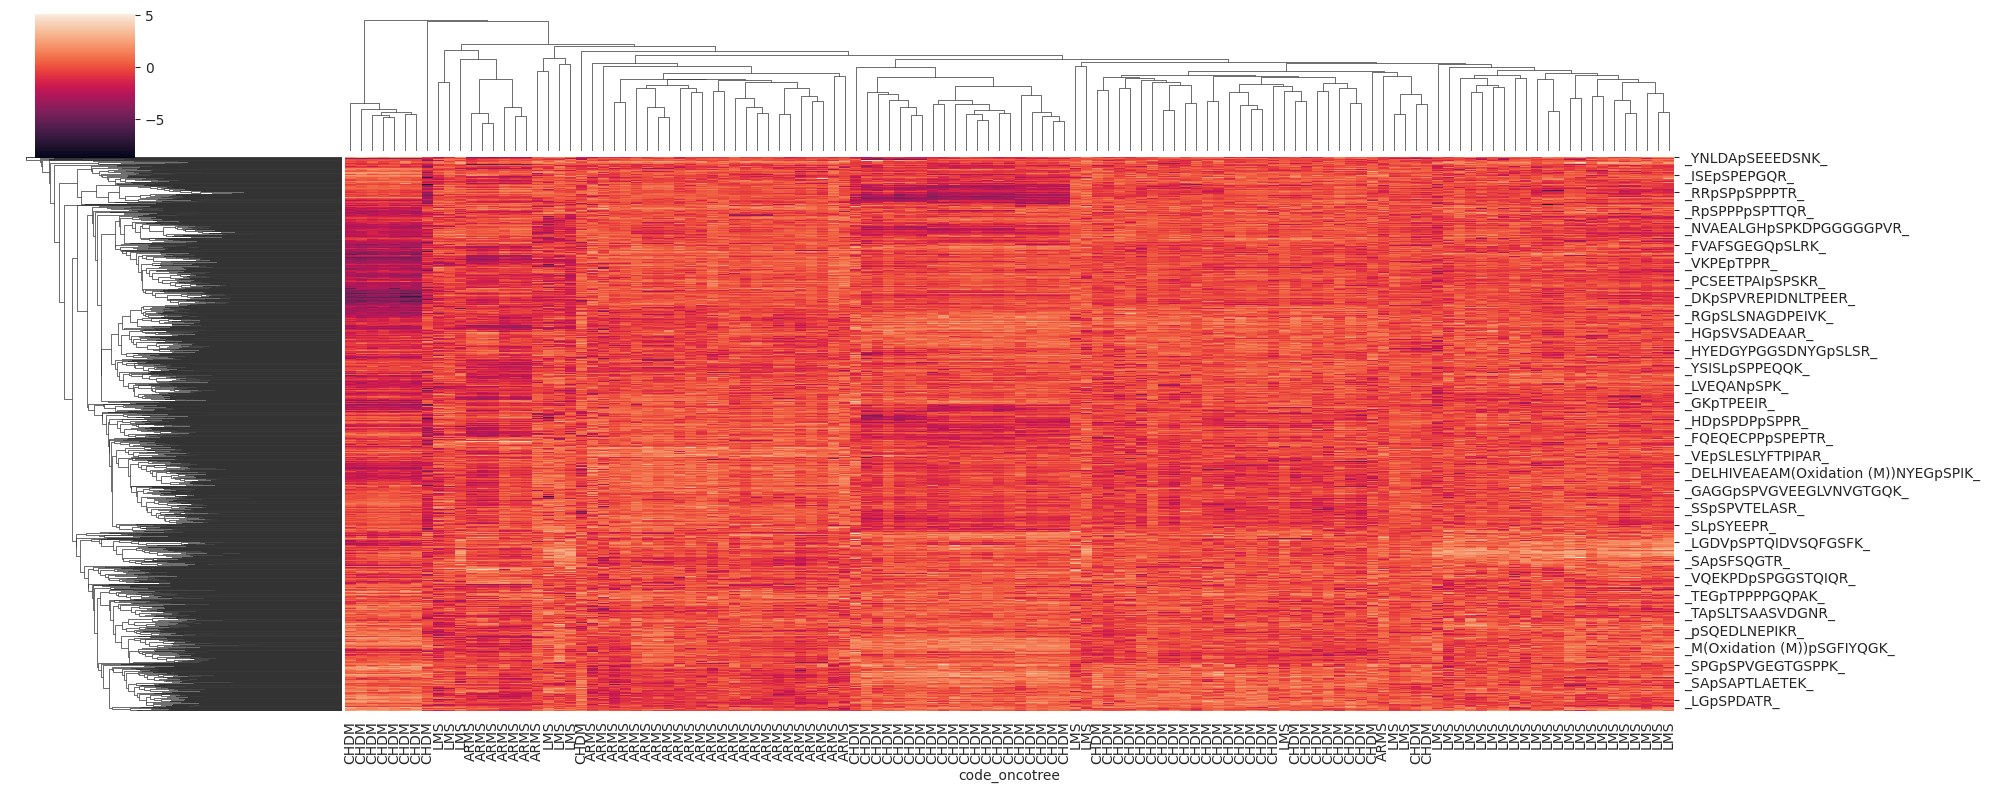

In [47]:
zscores_merged = zscores_merged.loc[~zscores_merged['code_oncotree'].isna()]
zscores_merged = zscores_merged.loc[
    zscores_merged['code_oncotree'].isin(['CHDM', 'ARMS', 'LMS']), ~zscores_merged.isna().any()].sort_values(
    by='code_oncotree')
sns.clustermap(zscores_merged.set_index('code_oncotree').T, figsize=(20, 8), xticklabels=True)

In [2]:
drug_pg = pd.read_csv('/home/fhamood/Desktop/drug_annotations.csv')

In [3]:
drug_pg.loc[(drug_pg['Drug'] == 'Dasatinib') & (drug_pg['Curve Regulation'] == 'down')]

,Unnamed: 0,Drug,Site positions,Modified sequences in curves,pEC50,Curve Regulation,Dataset Count,weight
9763,9862,Dasatinib,O00562-2_S600,RGSMNNELLS(ph)PEFGPVRDPLADGVEGLGR,5.731785274452981,down,1,1.0
9764,9863,Dasatinib,O00562_S600,RGSMNNELLS(ph)PEFGPVRDPLADGVEGLGR,5.731785274452981,down,1,1.0
9767,9866,Dasatinib,O14545_S409,LDS(ph)QPQETS(ph)PELPR,5.2563619805125,down,1,1.0
9768,9867,Dasatinib,O14545_S415,LDS(ph)QPQETS(ph)PELPR,5.2563619805125,down,1,1.0
9769,9870,Dasatinib,O14974-2_T397,TKPLASVTNANTSSTQAAPVAVTT(ph)PTVSSGQATPTS(ph)PIKK,6.140462272522661,down,1,1.0
...,...,...,...,...,...,...,...,...
10415,10525,Dasatinib,Q9Y2H0-3_S434,QNS(ph)ATESADSIEIYVPEAQTR,6.02370686223577,down,1,1.0
10416,10526,Dasatinib,Q9Y2H0_S973,QNS(ph)ATESADSIEIYVPEAQTR,6.02370686223577,down,1,1.0
10420,10530,Dasatinib,Q9Y3P9_T35,QGDET(ph)PSTNNGSDDEK,5.645295063394761,down,1,1.0
10421,10531,Dasatinib,Q9Y4G2_S482,HFS(ph)QEPR,5.31395525377533,down,1,1.0


In [4]:
site_counts = drug_pg.groupby('Drug')['Curve Regulation'].value_counts().unstack()
site_counts
# site_counts = site_counts.loc[~site_counts.isna().any(axis=1)]
# site_counts[['up', 'down']] = site_counts[['up', 'down']].astype(int)
# site_counts.sort_values(by='down', ascending=False)

Curve Regulation,down,up
Drug,,
AZD0156,196.0,259.0
AZD4547,208.0,250.0
Abemaciclib,354.0,178.0
Acalabrutinib,2.0,8.0
Afatinib,31.0,49.0
...,...,...
Vatalanib,5.0,21.0
Vemurafenib,223.0,33.0
Volasertib,68.0,114.0


Text(0.5, 1.0, 'Downregulated phosphosites per drug')

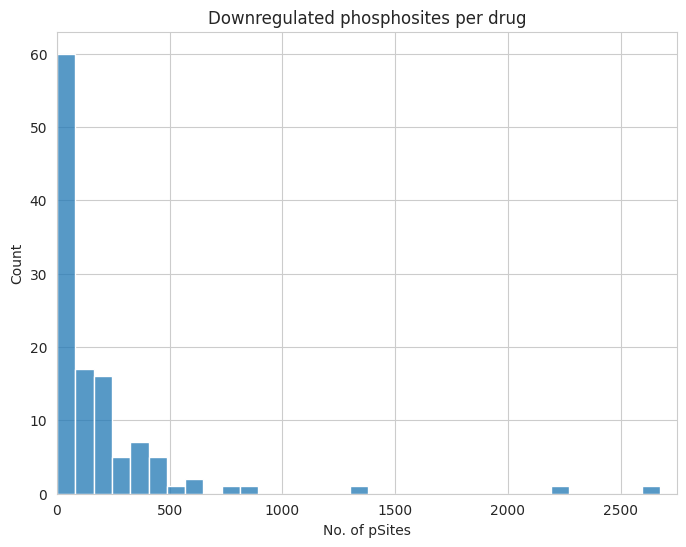

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(data=site_counts['down'])
plt.xlim(0, 2750)
plt.xlabel('No. of pSites')
plt.title('Downregulated phosphosites per drug')

In [141]:
from statsmodels.stats.multitest import multipletests

annot_scores['code_oncotree'] = annot_scores['code_oncotree'].apply(
    lambda x: x if x in set(rms_patients.values()) else 'Other')

stat_df = pd.DataFrame(columns=['Kinase', 'Subtype', 'Samples', 'Mean', 'pVal', 't-stat', 'corr_pVal'])

for kinase in ['ATM', 'ATR', 'DNAPK']:
    tempdf = pd.DataFrame(columns=['Kinase', 'Subtype', 'Samples', 'Mean', 'pVal', 't-stat'])
    print()
    popmean = annot_scores.loc[annot_scores['code_oncotree'] == 'Other', kinase].mean()
    print(f'Kinase: {kinase}, \tmean: {popmean.round(7)}')
    subtypes = annot_scores['code_oncotree'].unique()
    for subtype in subtypes:
        sample = annot_scores.loc[annot_scores['code_oncotree'] == subtype, kinase]
        mean = sample.mean()
        test_results = sp.stats.ttest_1samp(sample, popmean)
        samples = test_results.df + 1
        pval = test_results.pvalue
        stat = test_results.statistic
        print(
            f'{subtype}, \tsamples: {samples}, \tmean:{mean.round(9)}, \tpVal: {pval.round(9)}, \t statistic: {stat.round(7)}')
        temp = pd.DataFrame([[kinase, subtype, samples, mean, pval, stat]],
                            columns=['Kinase', 'Subtype', 'Samples', 'Mean', 'pVal', 't-stat'])
        tempdf = pd.concat([temp, tempdf])
    fdrdf = pd.DataFrame(multipletests(tempdf['pVal'], method='fdr_bh')[0:2], index=['reject', 'pval_corr']).T
    tempdf = tempdf.reset_index(drop=True)
    print(tempdf)
    tempdf = pd.concat([tempdf, fdrdf], axis=1)
    print(tempdf)
#     print(tempdf)
#     raise ValueError
#     print(tempdf)
#
# stat_df


Kinase: ATM, 	mean: -0.0819566
ARMS, 	samples: 32, 	mean:1.082623807, 	pVal: 5.4994e-05, 	 statistic: 4.6712215
Other, 	samples: 292, 	mean:-0.081956568, 	pVal: 1.0, 	 statistic: 0.0
PLRMS, 	samples: 4, 	mean:0.203697359, 	pVal: 0.135796598, 	 statistic: 2.0265379
ERMS, 	samples: 26, 	mean:1.336591892, 	pVal: 9.103e-06, 	 statistic: 5.5475855
RMS, 	samples: 3, 	mean:-0.305118362, 	pVal: 0.546790069, 	 statistic: -0.7190183
SCRMS, 	samples: 6, 	mean:0.016809868, 	pVal: 0.785176135, 	 statistic: 0.287622
  Kinase Subtype Samples      Mean      pVal    t-stat
0    ATM   SCRMS       6  0.016810  0.785176  0.287622
1    ATM     RMS       3 -0.305118  0.546790 -0.719018
2    ATM    ERMS      26  1.336592  0.000009  5.547585
3    ATM   PLRMS       4  0.203697  0.135797  2.026538
4    ATM   Other     292 -0.081957  1.000000  0.000000
5    ATM    ARMS      32  1.082624  0.000055  4.671222
  Kinase Subtype Samples      Mean      pVal    t-stat reject pval_corr
0    ATM   SCRMS       6  0.016810

<AxesSubplot: xlabel='ATM', ylabel='Density'>

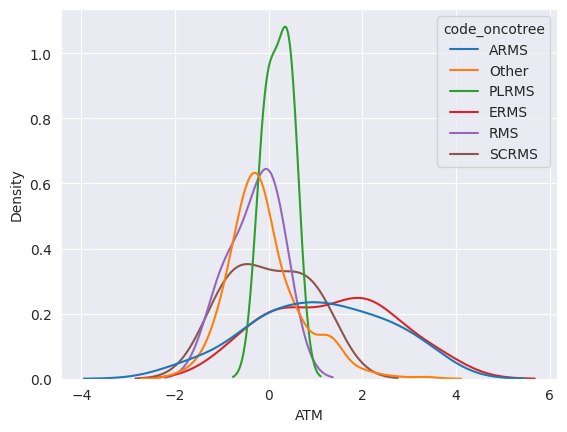

In [86]:
sns.kdeplot(data=annot_scores, x='ATM', hue='code_oncotree', common_norm=False)